In [514]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import sys
import pprint
import praw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [515]:
#  Create Reddit client
reddit = praw.Reddit(client_id='l4Y_x_iOub-T-w', client_secret='-ir419rEH0WXI94O6eIzaAmPK00MXQ', user_agent='Scraper')


In [516]:
SpotifyClientCredentials.client_id='3d60b0b394244dc884ff1a62fd0958b8'
SpotifyClientCredentials.client_secret='5b9b4fe139a3418d82c7497eb848f28e'
client_credentials_manager = SpotifyClientCredentials()
client_credentials_manager.client_id='3d60b0b394244dc884ff1a62fd0958b8'
client_credentials_manager.client_secret='5b9b4fe139a3418d82c7497eb848f28e'
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [517]:
search_str = "QOTSA"



In [518]:
result = sp.search(q=search_str,type='artist')
#result = sp.artists(search_str)
pprint.pprint(result)
result['artists']['items'][0]['name']

{'artists': {'href': 'https://api.spotify.com/v1/search?query=QOTSA&type=artist&offset=0&limit=10',
             'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4pejUc4iciQfgdX6OKulQn'},
                        'followers': {'href': None, 'total': 2486369},
                        'genres': ['alternative metal',
                                   'alternative rock',
                                   'blues rock',
                                   'modern rock',
                                   'nu metal',
                                   'palm desert scene',
                                   'rock',
                                   'stoner metal',
                                   'stoner rock'],
                        'href': 'https://api.spotify.com/v1/artists/4pejUc4iciQfgdX6OKulQn',
                        'id': '4pejUc4iciQfgdX6OKulQn',
                        'images': [{'height': 640,
                                    'url': 'https://i.scdn.

'Queens of the Stone Age'

In [519]:
# Get the comments from Reddit

list_username = []
list_usercreated = []
comments = []
submission = reddit.submission(id="k7g77u")
submission.comments.replace_more(limit=None)
for i,top_level_comment in enumerate(submission.comments):
    #print('---------------------------------------------------------------------------------------\n')
    #print('comment #'+str(i+1))
#     if top_level_comment.body.split(",")[0]=='List' or top_level_comment.body.split(",")[0]=='list':
#         comments += [top_level_comment.body,]
#     else:
#         print('============>> !!!!!! COMMENT IGNORED  !!!!!!!')
    try:
        #print(top_level_comment.body)
        username = top_level_comment.author
        user = reddit.redditor(username)    
        list_username += [username,]
        list_usercreated += [datetime.datetime.fromtimestamp(user.created_utc).isoformat(),]          
        comments += [top_level_comment.body,]
    except:
        print('comment #',i+1,'failed')
        
    #print('---------------------------------------------------------------------------------------\n')

comment # 669 failed


In [520]:
len(comments)

765

In [521]:
df = []
for comment in comments:
    df += [[band.replace('List',' ') for band in comment.split(',')],]
df  = pd.DataFrame({'comments':df})
df

,comments
0,"[ , Led Zeppelin, Black Sabbath, Deep Purpl..."
1,"[ , Ponk Floyd, Porcupine Tree, Steven Wils..."
2,"[ , MF DOOM, The Beatles, Miles Davis, Bob..."
3,"[ , radiohead, beatles, led zeppelin, mgmt..."
4,"[ , Tool, Kyuss, Baroness, Pelican, Dropk..."
...,...
760,"[ , R.E.M., Dire Straits, Portishead, Bruc..."
761,"[ , Dream Theater, Rush, Queensryche, Mari..."
762,"[ , Rush, Fleetwood Mac, Yes, Guns n Roses..."
763,"[ , The Flaming Lips, Wax Fang, Enter Shika..."


In [522]:
print(len(list_username))
print(len(list_usercreated))

765
765


In [527]:
# df__ = pd.DataFrame({'allcomments':list(np.concatenate(np.array(df['comments'])))})
# print("There are",len(df__.allcomments.unique()),"unique Artist names")
# print("There are ",len(df__),"band inputs")

df__ = pd.DataFrame({'allcomments':list(list_username)})
print("There are",len(df__.allcomments.unique()),"unique user names")
print("There are ",len(df__),"username inputs")


There are 751 unique user names
There are  765 username inputs


In [446]:
##### !!!!! Don't run unless necessary !!!!!
dict_bands = {}

In [528]:
df = []
usname = []
uscreated = []
for i,comment in enumerate(comments):
    comment = [band.replace('List',' ') for band in comment.split(',')]
    list_artist = []
    for artist in comment:
        artist = artist.strip()    # remove white spaces
        if len(artist)==0: continue
        #print(artist)  
        try:
            artistname = dict_bands[artist]
            list_artist += [artistname,]
        except:
            result = sp.search(q=artist,type='artist')
            if len(result['artists']['items'])>0:
                artistname = result['artists']['items'][0]['name']    
                list_artist += [artistname,]
                dict_bands[artist] = artistname
                #print(artistname)
    if len(list_artist)>0:
        df += [list_artist,]
        usname += [list_username[i],]
        uscreated += [list_usercreated[i],]        
df  = pd.DataFrame({'comments':df})
df





,comments
0,"[Led Zeppelin, Black Sabbath, Deep Purple, The..."
1,"[Pink Floyd, Porcupine Tree, Steven Wilson, Th..."
2,"[MF DOOM, The Beatles, Miles Davis, Bob Dylan,..."
3,"[Radiohead, The Beatles, Led Zeppelin, MGMT, F..."
4,"[TOOL, Kyuss, Baroness, PELICAN FANCLUB, Dropk..."
...,...
752,"[R.E.M., Dire Straits, Portishead, Bruce Sprin..."
753,"[Dream Theater, Rush, Queensrÿche, Marillion]"
754,"[Rush, Fleetwood Mac, Yes, Guns N' Roses, The ..."
755,"[The Flaming Lips, Wax Fang, Enter Shikari, Th..."


In [576]:
print(len(usname))
print(len(uscreated))


757
757


In [577]:
df__ = pd.DataFrame({'allcomments':list(usname)})
print("There are",len(df__.allcomments.unique()),"unique user names")
print("There are ",len(df__),"username inputs")



There are 747 unique user names
There are  757 username inputs


In [578]:
df2 = pd.DataFrame({'allcomments':list(np.concatenate(np.array(df['comments'])))})
print("There are",len(df2.allcomments.unique()),"unique Artist names")
y = pd.get_dummies(df2.allcomments)
y

There are 1873 unique Artist names


,!!!,"""Weird Al"" Yankovic",$uicideBoy$,*Shels,"10,000 Maniacs",100 gecs,13th Floor Elevators,21 Savage,2CELLOS,2Pac,...,mewithoutYou,of Montreal,slowthai,sophie meiers,the peggies,the pillows,toe,tricot,Æther Realm,２８１４
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [579]:
## Remove Pink Floyd from list
y.drop(['Pink Floyd'],axis=1,inplace=True)

In [580]:
# plt.figure(figsize=(28,6))
# y.sum(axis=0).plot(kind='bar')

In [581]:
# plt.figure(figsize=(28,6))
# y.sum(axis=0).sort_values(ascending=False).plot(kind='bar')

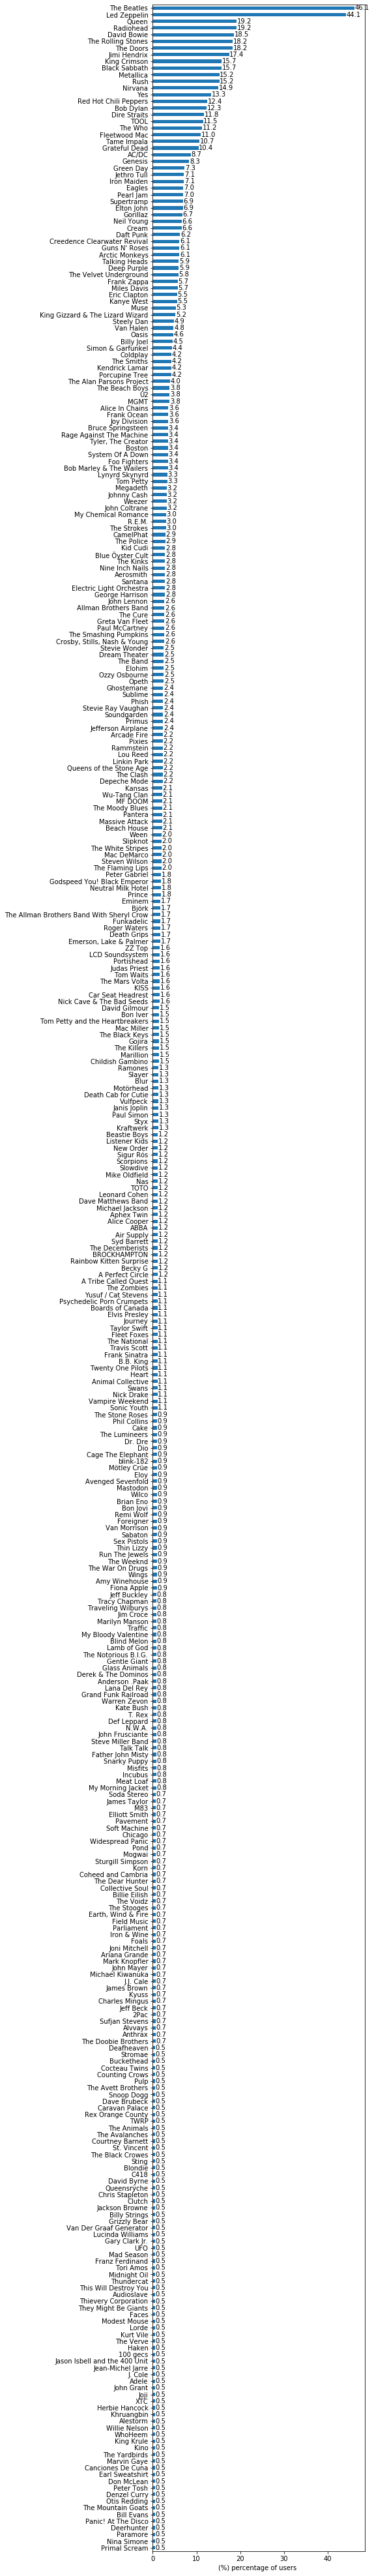

In [550]:
plt.figure(figsize=(8,55))
plt.xlabel('(%) percentage of users ')
yy = (y.sum(axis=0)/len(df.iloc[:,0])*100.).sort_values(ascending=True)
yy[yy>3/len(df.iloc[:,0])*100].plot(kind='barh')
for i,val in enumerate(yy[yy>3/len(df.iloc[:,0])*100]):
    plt.annotate(s='%.1f'%(val),xy=(val+0.1,i-0.3),xycoords='data')
    
plt.tight_layout()
plt.savefig('pinkfloyd_fig1.png',dpi=200)

In [582]:
yy['Primus']

2.3778071334214

In [583]:
y.iloc[:,:] = 0
for i,comment in enumerate(df.comments):
    for artist in comment:
        y.loc[i,artist]=1
    #print("comment #",i+1,"ready")
y=y.loc[:len(df.comments)-1,:]        

In [584]:
y.drop('Pink Floyd',axis=1,inplace=True)
y

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,!!!,"""Weird Al"" Yankovic",$uicideBoy$,*Shels,"10,000 Maniacs",100 gecs,13th Floor Elevators,21 Savage,2CELLOS,2Pac,...,mewithoutYou,of Montreal,slowthai,sophie meiers,the peggies,the pillows,toe,tricot,Æther Realm,２８１４
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [585]:
y.sum(axis=0).sort_values(ascending=False)[:50]

The Beatles                         348
Led Zeppelin                        334
Queen                               145
Radiohead                           145
David Bowie                         140
The Rolling Stones                  138
The Doors                           136
Jimi Hendrix                        131
King Crimson                        119
Black Sabbath                       119
Metallica                           115
Rush                                114
Nirvana                             113
Yes                                 101
Red Hot Chili Peppers                94
Bob Dylan                            93
Dire Straits                         89
TOOL                                 87
The Who                              85
Fleetwood Mac                        83
Tame Impala                          81
Grateful Dead                        79
AC/DC                                66
Genesis                              62
Green Day                            55


In [646]:
morethan20_artist = y.sum(axis=0)[y.sum(axis=0)>34].index
morethan20_y = y.loc[:,morethan20_artist]
print(morethan20_y.shape)
morethan20_y = morethan20_y[morethan20_y.sum(axis=1)>0]
print(morethan20_y.shape)
# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 4
# run k-means clustering
#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(morethan20_y)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(morethan20_y.drop(['The Beatles','Led Zeppelin'],axis=1,inplace=False))
#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(y.iloc[:,:])

pd.Series(kmeans.labels_).value_counts()

(757, 50)
(731, 50)


0    357
3    131
1    131
2    112
dtype: int64

In [647]:
morethan20_y_grouped = morethan20_y
morethan20_y_grouped['labels']= kmeans.labels_

In [648]:
avg_df = morethan20_y_grouped.groupby('labels').mean()
avg_df

,AC/DC,Arctic Monkeys,Black Sabbath,Bob Dylan,Cream,Creedence Clearwater Revival,Daft Punk,David Bowie,Deep Purple,Dire Straits,...,TOOL,Talking Heads,Tame Impala,The Beatles,The Doors,The Rolling Stones,The Velvet Underground,The Who,Van Halen,Yes
labels,,,,,,,,,,,,,,,,,,,,,
0,0.047619,0.072829,0.064426,0.075630,0.019608,0.028011,0.061625,0.120448,0.025210,0.084034,...,0.100840,0.039216,0.123249,0.422969,0.100840,0.067227,0.039216,0.042017,0.011204,0.019608
1,0.038168,0.015267,0.152672,0.076336,0.053435,0.022901,0.068702,0.297710,0.068702,0.091603,...,0.137405,0.061069,0.122137,0.404580,0.076336,0.022901,0.061069,0.076336,0.015267,0.564885
2,0.169643,0.044643,0.428571,0.089286,0.080357,0.062500,0.062500,0.089286,0.089286,0.133929,...,0.241071,0.035714,0.071429,0.473214,0.223214,0.187500,0.026786,0.089286,0.169643,0.080357
3,0.190840,0.099237,0.213740,0.351145,0.206107,0.198473,0.061069,0.366412,0.129771,0.244275,...,0.045802,0.145038,0.099237,0.694656,0.496183,0.687023,0.145038,0.381679,0.083969,0.083969


King Crimson                        0.732824
Yes                                 0.564885
Led Zeppelin                        0.442748
The Beatles                         0.404580
Genesis                             0.305344
David Bowie                         0.297710
Rush                                0.274809
Radiohead                           0.251908
Jethro Tull                         0.206107
Black Sabbath                       0.152672
Queen                               0.137405
Jimi Hendrix                        0.137405
TOOL                                0.137405
Frank Zappa                         0.129771
Tame Impala                         0.122137
Elton John                          0.114504
King Gizzard & The Lizard Wizard    0.106870
Nirvana                             0.106870
Dire Straits                        0.091603
Miles Davis                         0.091603
Gorillaz                            0.091603
Red Hot Chili Peppers               0.091603
Grateful D

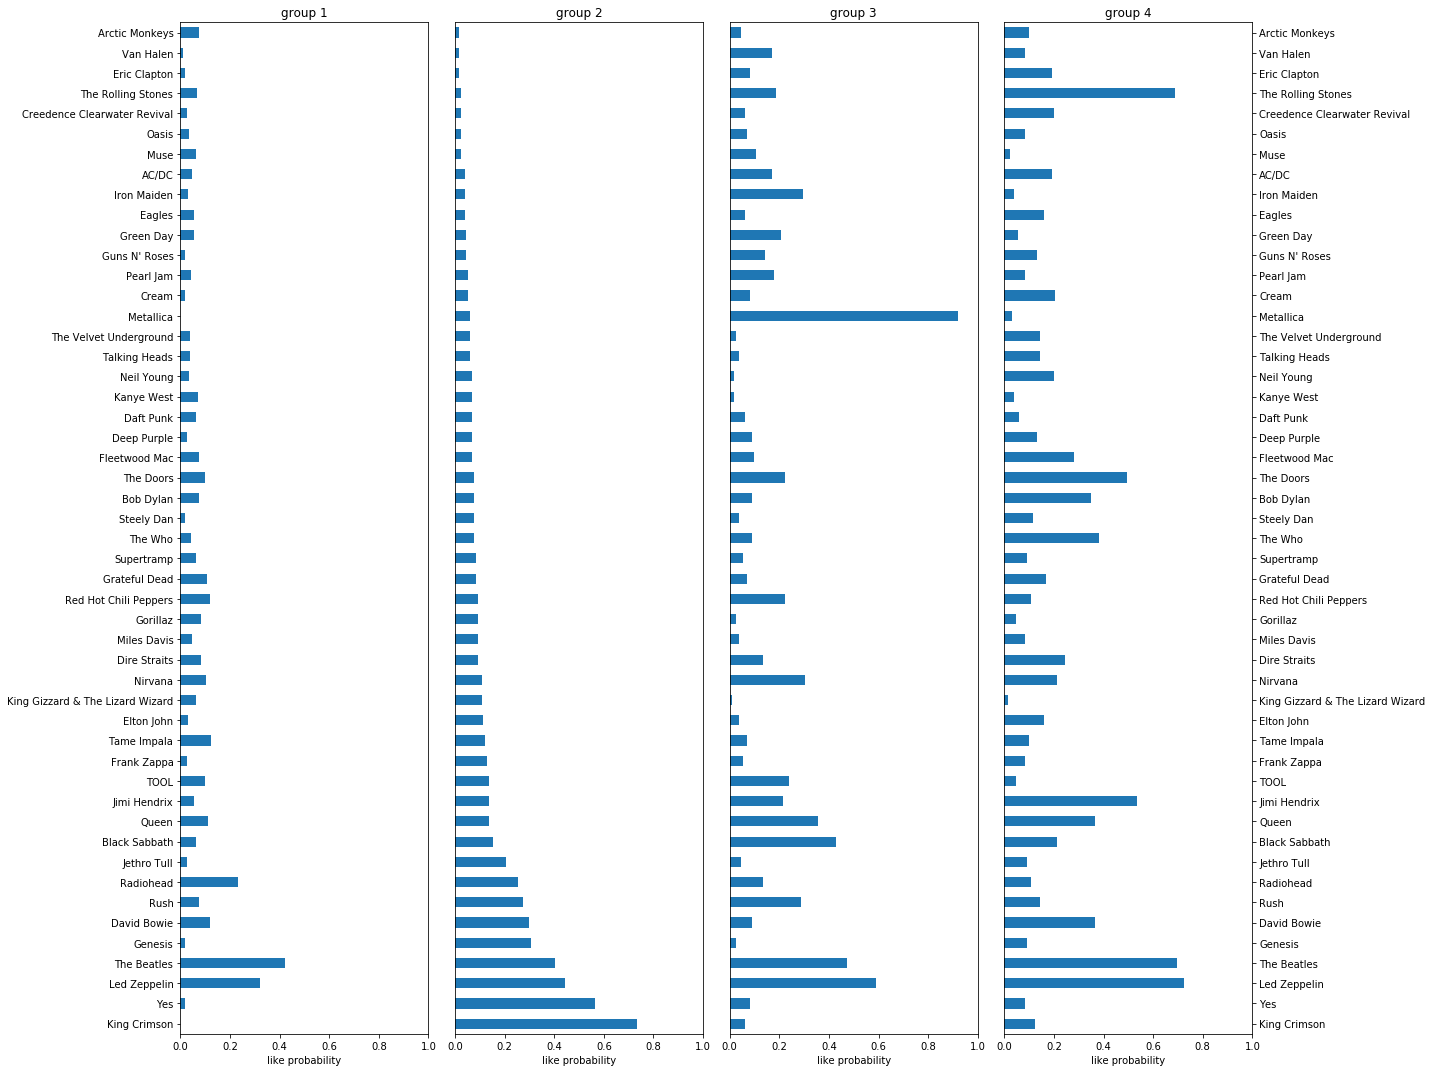

In [666]:
plt.figure(figsize=(20,15))
print(avg_df.iloc[1,:].sort_values(ascending=False))
cols = avg_df.iloc[1,:].sort_values(ascending=False).index

for i in range(kclusters):
    ax = plt.subplot(1,kclusters,i+1)
    avg_df.loc[i,cols].plot(kind='barh',ax=ax)
    if i>0 and i<range(kclusters)[-1]:
        plt.yticks([],[])
    if i==range(kclusters)[-1]:
        ax.yaxis.tick_right()
    ax.set_xlim(0,1)
    ax.set_title('group '+str(i+1))
    ax.set_xlabel('like probability')
plt.tight_layout()
plt.savefig('fig2.png')    
plt.show()

In [650]:
y_allbands_grouped = y.loc[morethan20_y.index.values,:]
y_allbands_grouped['labels'] = kmeans.labels_
y_allbands_grouped
avg_df2 = y_allbands_grouped.groupby('labels').mean()
avg_df2

,!!!,"""Weird Al"" Yankovic",$uicideBoy$,*Shels,"10,000 Maniacs",100 gecs,13th Floor Elevators,21 Savage,2CELLOS,2Pac,...,mewithoutYou,of Montreal,slowthai,sophie meiers,the peggies,the pillows,toe,tricot,Æther Realm,２８１４
labels,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.002801,0.000000,0.000000,0.000000,0.000000,0.002801,0.000000,0.000000,0.005602,...,0.002801,0.002801,0.005602,0.000000,0.000000,0.002801,0.002801,0.002801,0.000000,0.000000
1,0.000000,0.000000,0.007634,0.007634,0.000000,0.007634,0.007634,0.007634,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007634
2,0.008929,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.017857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008929,0.000000
3,0.000000,0.007634,0.000000,0.000000,0.007634,0.007634,0.000000,0.000000,0.015267,0.007634,...,0.000000,0.000000,0.007634,0.007634,0.007634,0.000000,0.000000,0.000000,0.000000,0.000000


In [651]:
print(avg_df2.iloc[0,:].sort_values(ascending=False)[:20])
print(avg_df2.iloc[1,:].sort_values(ascending=False)[:20])
print(avg_df2.iloc[2,:].sort_values(ascending=False)[:20])
print(avg_df2.iloc[3,:].sort_values(ascending=False)[:20])

The Beatles              0.422969
Led Zeppelin             0.322129
Radiohead                0.232493
Tame Impala              0.123249
Red Hot Chili Peppers    0.120448
David Bowie              0.120448
Queen                    0.109244
Grateful Dead            0.106443
Nirvana                  0.103641
TOOL                     0.100840
The Doors                0.100840
Dire Straits             0.084034
Gorillaz                 0.084034
Rush                     0.075630
Bob Dylan                0.075630
Fleetwood Mac            0.072829
Arctic Monkeys           0.072829
Kanye West               0.070028
The Rolling Stones       0.067227
Kendrick Lamar           0.064426
Name: 0, dtype: float64
King Crimson                        0.732824
Yes                                 0.564885
Led Zeppelin                        0.442748
The Beatles                         0.404580
Genesis                             0.305344
David Bowie                         0.297710
Rush                      

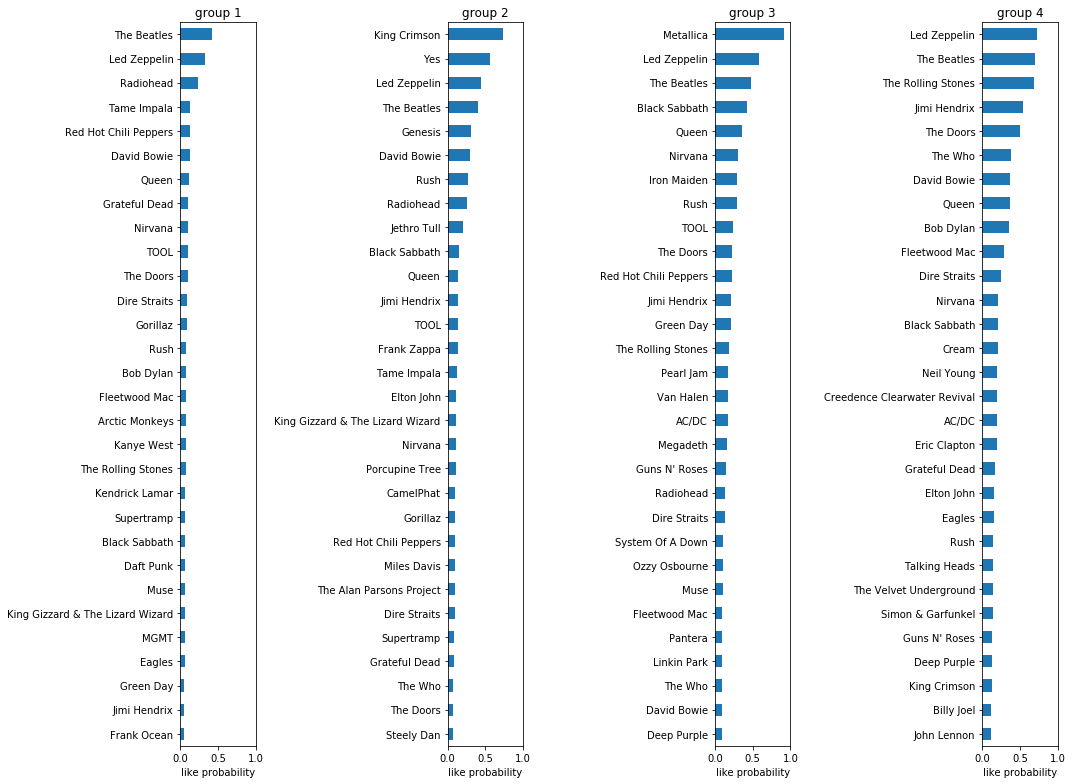

In [706]:
plt.figure(figsize=(15,11))
#print(avg_df2.iloc[1,:].sort_values(ascending=False))
#cols = avg_df2.iloc[1,:].sort_values(ascending=False).index

for i in range(kclusters):    
    ax = plt.subplot(1,kclusters,i+1)
    cols = avg_df2.iloc[i,:].sort_values(ascending=True)[-30:].index
    avg_df2.loc[i,cols].plot(kind='barh',ax=ax)
#    if i>0 and i<range(kclusters)[-1]:
#        plt.yticks([],[])
#    if i==range(kclusters)[-1]:
#        ax.yaxis.tick_right()
    ax.set_xlim(0,1)
    ax.set_title('group '+str(i+1))
    ax.set_xlabel('like probability')
plt.tight_layout()
plt.savefig('fig2.png',dpi=200)    
plt.show()

In [652]:
d1,d2,d3,d4=(avg_df2*100000).to_dict('records')



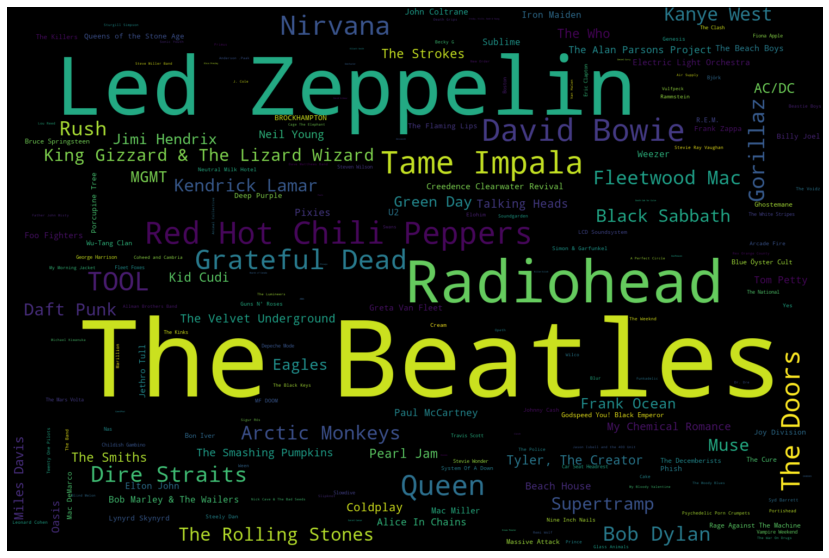

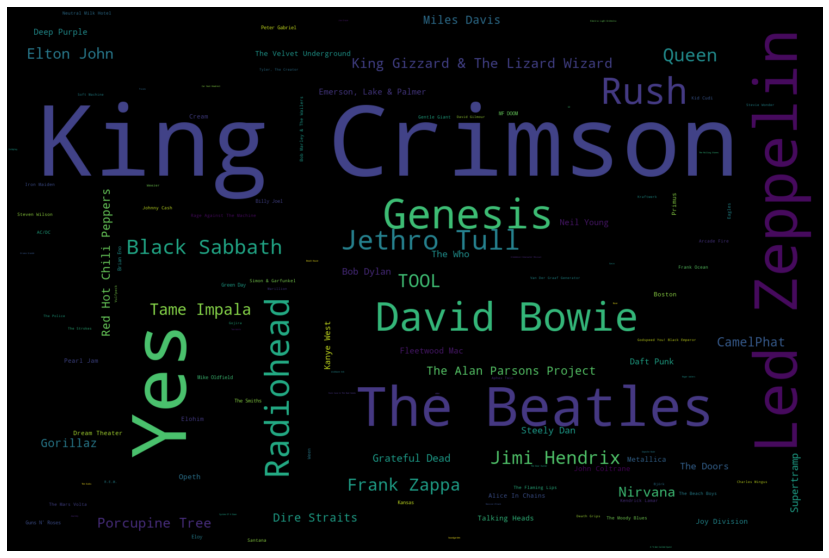

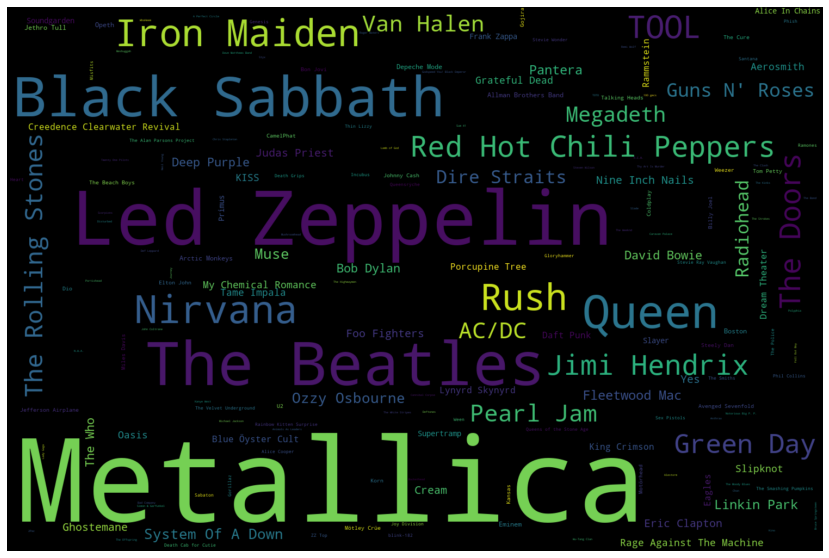

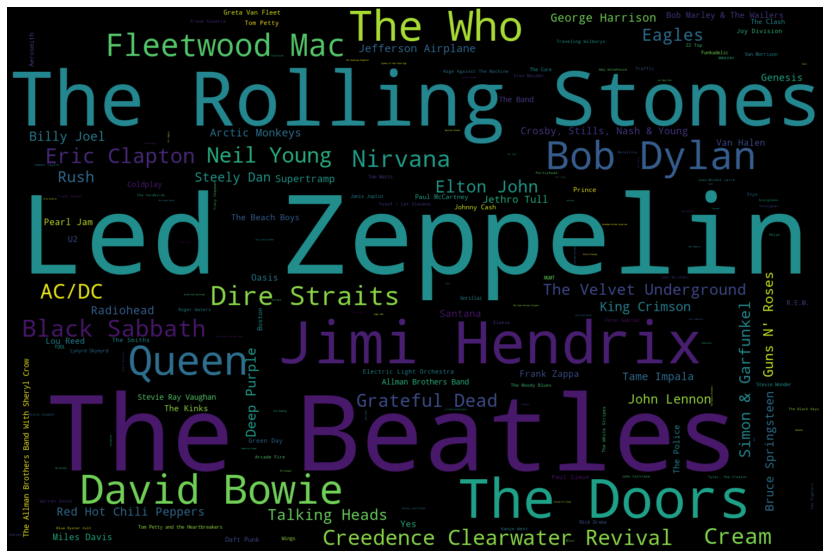

In [653]:
plt.figure(figsize=(15,10))
from wordcloud import WordCloud
wordcloud = WordCloud(width=1500,height=1000, max_words=200,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(d1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('PF_wordcloud1.png',dpi=100)
plt.show()

plt.figure(figsize=(15,10))
from wordcloud import WordCloud
wordcloud = WordCloud(width=1500,height=1000, max_words=200,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(d2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('PF_wordcloud2.png',dpi=100)
plt.show()

plt.figure(figsize=(15,10))
from wordcloud import WordCloud
wordcloud = WordCloud(width=1500,height=1000, max_words=200,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(d3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('PF_wordcloud3.png',dpi=100)
plt.show()

plt.figure(figsize=(15,10))
from wordcloud import WordCloud
wordcloud = WordCloud(width=1500,height=1000, max_words=200,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(d4)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('PF_wordcloud4.png',dpi=100)
plt.show()

In [601]:
len(y)

757

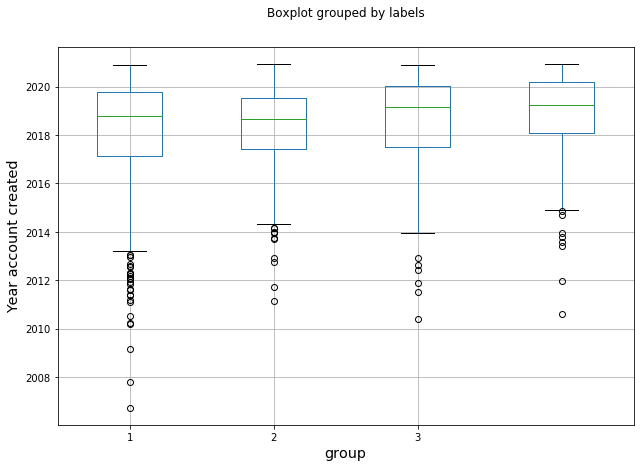

In [654]:
df_users = pd.DataFrame({'username':usname,'created':uscreated})
df_users = df_users.loc[morethan20_y.index.values,:]
df_users['labels'] = kmeans.labels_



df_users["created"] = df_users["created"].astype("datetime64")
df_users['decimal_date']=df_users["created"].dt.year+ (df_users["created"].dt.dayofyear -1)/365

# ##label 0
# plt.figure(figsize=(10,6))
# df_users["decimal_date"][df_users["labels"]==0].plot(kind="hist",bins=30)
# plt.xlim(2006,2021)
# plt.show()
# ##label 1
# plt.figure(figsize=(10,6))
# df_users["decimal_date"][df_users["labels"]==1].plot(kind="hist",bins=30)
# plt.xlim(2006,2021)
# plt.show()
# ##label 2
# plt.figure(figsize=(10,6))
# df_users["decimal_date"][df_users["labels"]==2].plot(kind="hist",bins=30)
# plt.xlim(2006,2021)
# plt.show()

df_users.boxplot(by='labels',column='decimal_date',figsize=(10,7))
plt.xticks(ticks=[1,2,3], labels=[1,2,3])
plt.xlabel('group',fontsize='x-large')
plt.ylabel('Year account created',fontsize='x-large')
plt.title('')
plt.savefig('fig_users_pinkfloyd.png',dpi=100)
plt.show()


In [657]:
#scipy.stats.ks_2samp
from scipy import stats
stats.ks_2samp(df_users["decimal_date"][df_users["labels"]==0],df_users["decimal_date"][df_users["labels"]==1])

Ks_2sampResult(statistic=0.07351337481557509, pvalue=0.6446310464433751)

In [675]:
morethan20_artist = y.sum(axis=0)[y.sum(axis=0)>20].index
morethan20_y = y.loc[:,morethan20_artist]

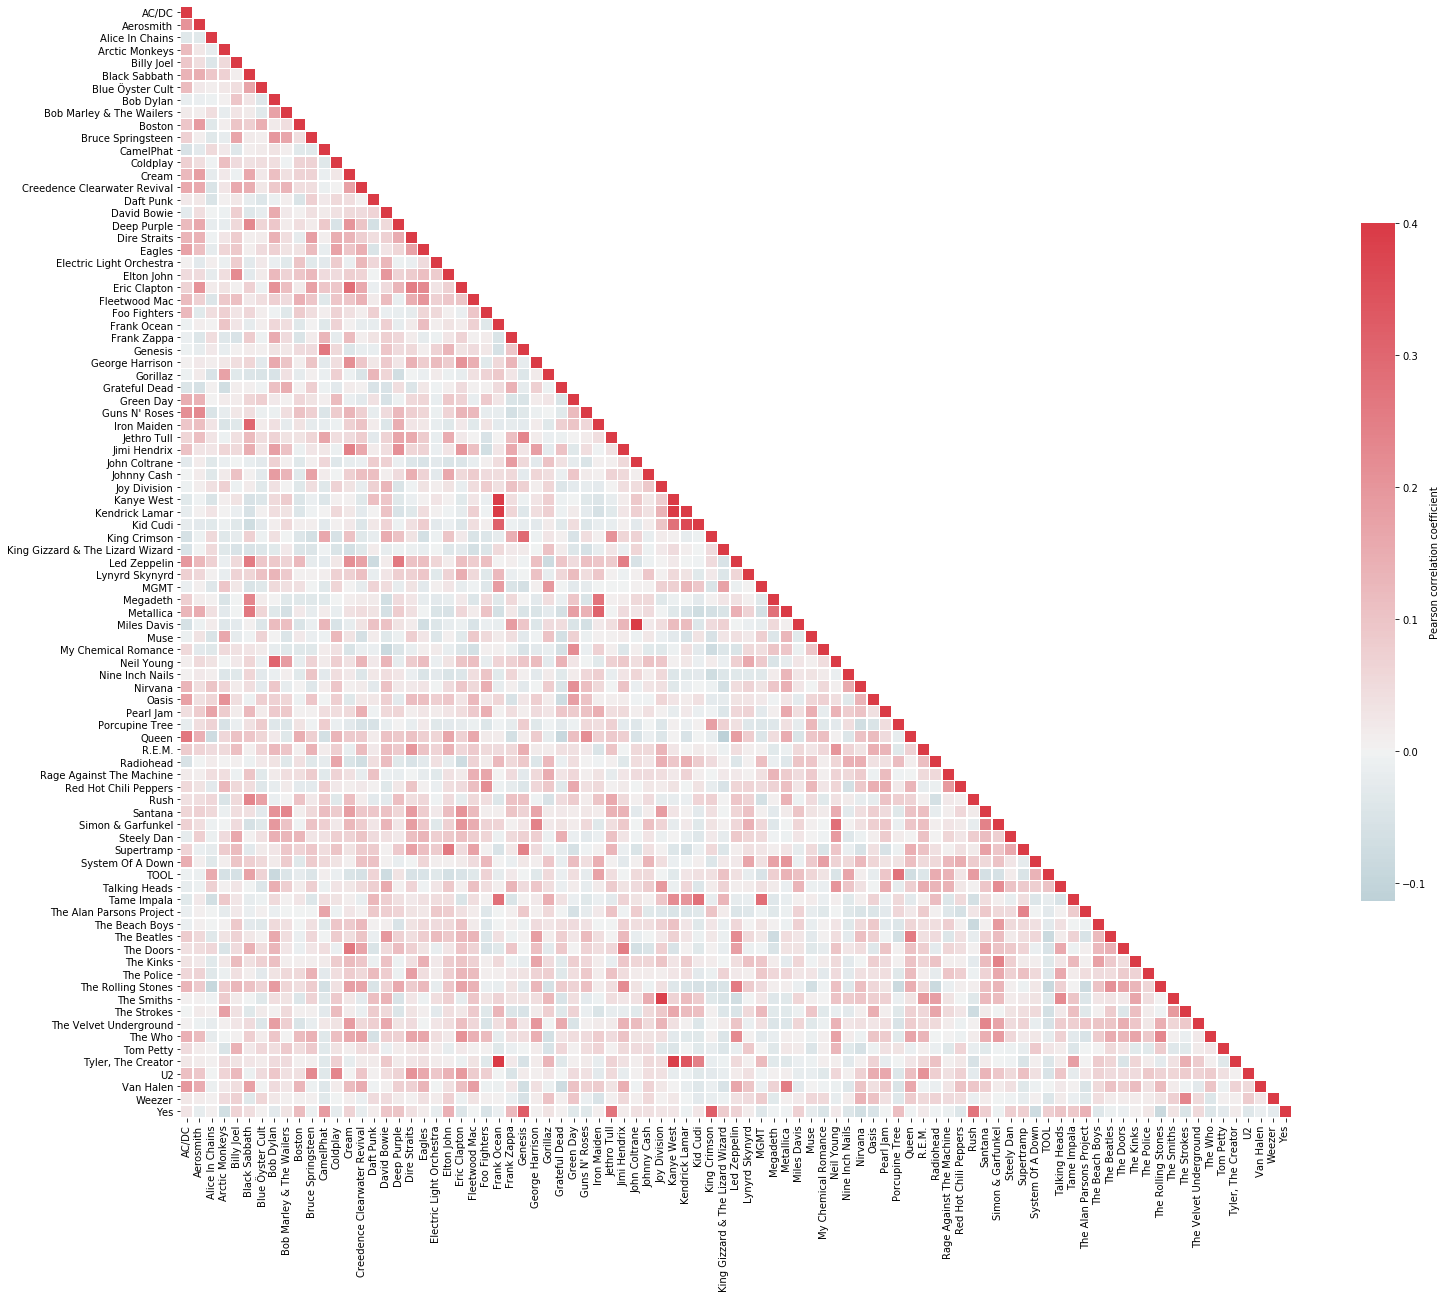

In [704]:
import seaborn as sns
def get_lower_tri_heatmap(df,output="cooc_matrix.png"):
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Want diagonal elements as well
    mask[np.diag_indices_from(mask)] = False

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(22, 24))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns_plot = sns.heatmap(df, mask=mask, cmap=cmap, vmax=.4, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .4,"label":"Pearson correlation coefficient"})
    # save to file
    fig = sns_plot.get_figure()
    fig.savefig(output)
    
tmp = morethan20_y
get_lower_tri_heatmap(tmp.corr())
plt.tight_layout()
plt.savefig('fig3.png',dpi=100)

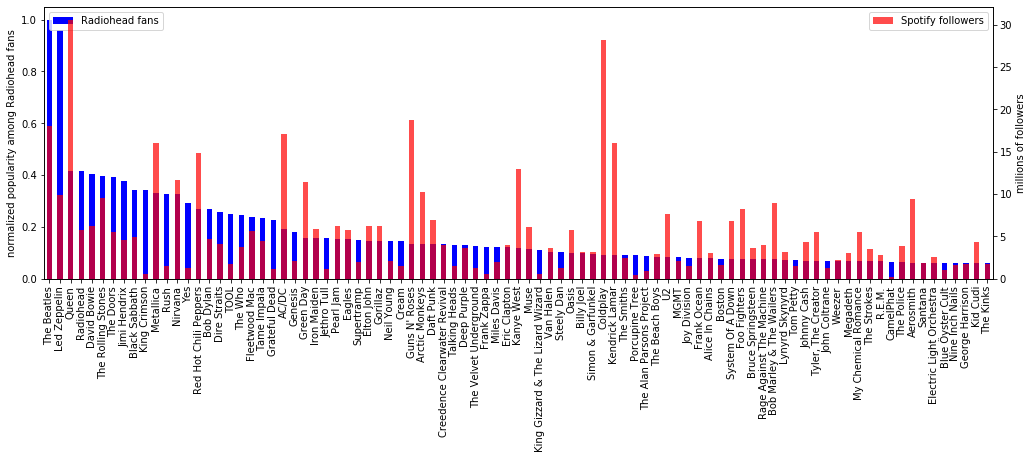

In [681]:
df3 = morethan20_y.sum().sort_values(ascending=False)
df3 = pd.DataFrame(df3/df3.max())
followers = []
for artist in df3.index:
    result = sp.search(q=artist,type='artist')
    this_followers = result['artists']['items'][0]['followers']['total']
    followers += [this_followers,]

#result_Rd = sp.search(q='Radiohead',type='artist')
#Rd_followers = result_Rd['artists']['items'][0]['followers']['total']    

df3['followers'] = followers
#df3['followers'] = df3['followers']/Rd_followers
#df3['followers'] = df3['followers'].max()
df3['followers'] = df3['followers']/1E6
#df3['ratio'] = df3[0]/df3[followers]


fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)
#ax.plot(list(df3.index),df3.iloc[:,0],label='Radiohead fans')
df3.plot(kind='bar',y=0,ax=ax,color='blue',label='Radiohead fans')
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('normalized popularity among Radiohead fans')
plt.legend(loc='upper left')
#ax.set_ylim(0,3)
ax2 = ax.twinx()
#ax2.plot(list(df3.index),df3.iloc[:,1]/1E6,label='Spotify followers')
df3.plot(kind='bar',y='followers',ax=ax2,color='red',label='Spotify followers',alpha=0.7)
ax2.tick_params(axis='x', rotation=90)
ax2.set_ylabel('millions of followers')
#ax2.set_ylim(0,3)
plt.xticks(rotation=90)
plt.show()

In [682]:
df3.columns = ['popularity','followers']

In [683]:
df3['ratio'] = (df3['popularity']/np.median(df3['popularity']))/(df3['followers']/np.median(df3['followers']))
df3

,popularity,followers,ratio
The Beatles,1.000000,18.027288,1.824310
Led Zeppelin,0.959770,9.904185,3.186967
Queen,0.416667,30.567964,0.448282
Radiohead,0.416667,5.690033,2.408258
David Bowie,0.402299,6.234793,2.122051
...,...,...,...
Blue Öyster Cult,0.060345,0.978644,2.027890
Nine Inch Nails,0.060345,1.652231,1.201153
George Harrison,0.060345,1.692765,1.172391
Kid Cudi,0.060345,4.296709,0.461884


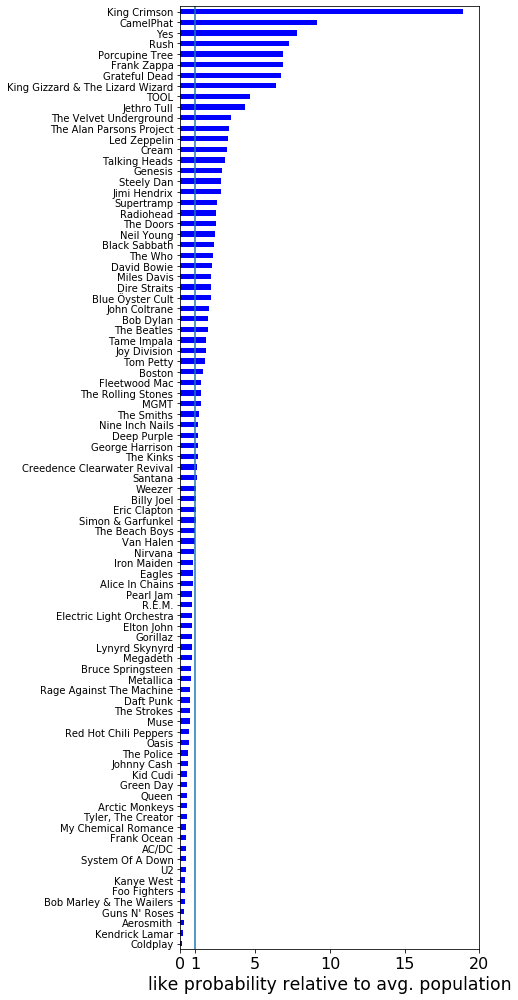

In [703]:

fig = plt.figure(figsize=(7,14))
ax = fig.add_subplot(111)

df3.sort_values(by='ratio',ascending=True,inplace=True)
df3.plot(kind='barh',y='ratio',ax=ax,color='blue',legend=False)
#ax.tick_params(axis='x', rotation=90)
#ax.set_ylabel('normalized popularity among Radiohead fans')
#plt.legend(loc='upper left')
#ax2 = ax.twinx()
#ax2.plot(list(df3.index),df3.iloc[:,1]/1E6,label='Spotify followers')
#df3.plot(kind='bar',y='followers',ax=ax2,color='red',label='Spotify followers',alpha=0.7)
#ax2.tick_params(axis='x', rotation=90)
#ax2.set_ylabel('millions of followers')

#plt.yscale('log')
plt.axvline(1)
plt.xticks([0,1,5,10,15,20], ["0","1","5","10","15","20"])
plt.xticks(fontsize=16)
#plt.yticks(fontsize=16)
plt.xlabel("like probability relative to avg. population",fontsize='xx-large')
plt.tight_layout()
plt.savefig('pinkfloyd_relativeLike.png',dpi=100)
plt.show()